<a href="https://colab.research.google.com/github/emendiola-vaz/MPM_200_Mendiola/blob/main/Code/MPM200_Session5_HW_EMendiola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [107]:
install.packages('beepr')
library(beepr)
beep(sound="mario")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [108]:
install.packages('tidyverse')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('sjPlot')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [109]:
#read the csv file and
data  = read.csv('Hummingbird_data.csv')

In [110]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

***6908 rows and 12 columns***

In [111]:
## your code answer here
nrow(data)
ncol(data)

[1] 6908

[1] 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [112]:
str(data)

'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [113]:
# Identify data types of each column
data_types = sapply(data, class)
print(data)

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [114]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

***5000 rows and 12 columns***

In [115]:
nrow(model_data)
ncol(model_data)

[1] 5000

[1] 12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

***11 categorical and 1 continuous variable***

In [116]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "6/15/2001" "8/2/2011" "6/24/1995" "6/8/1992" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "Yes" "No" "No" "No" ...
 $ Species_e         : chr  "Non-selasphorus" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "unknown" "Male" "Female-like " "Female-like " ...
 $ Age_e             : chr  "Nestling" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ season            : chr  "Summer" "Summer" "Summer" "Summer" ...
 $ r                 : chr  "found on the ground" "found on the ground" "nest-related" "found on the ground" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "2069_ANHU" "4287_ANHU" "884_ANHU" "309_ANHU" ...


**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [ ]:
# HOW TO DOWNLOAD???
# I dowloaded it from the three dots in the files folder

In [117]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [118]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4143
Santa Barbara,76
malibu,781


In [121]:
rehab = model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

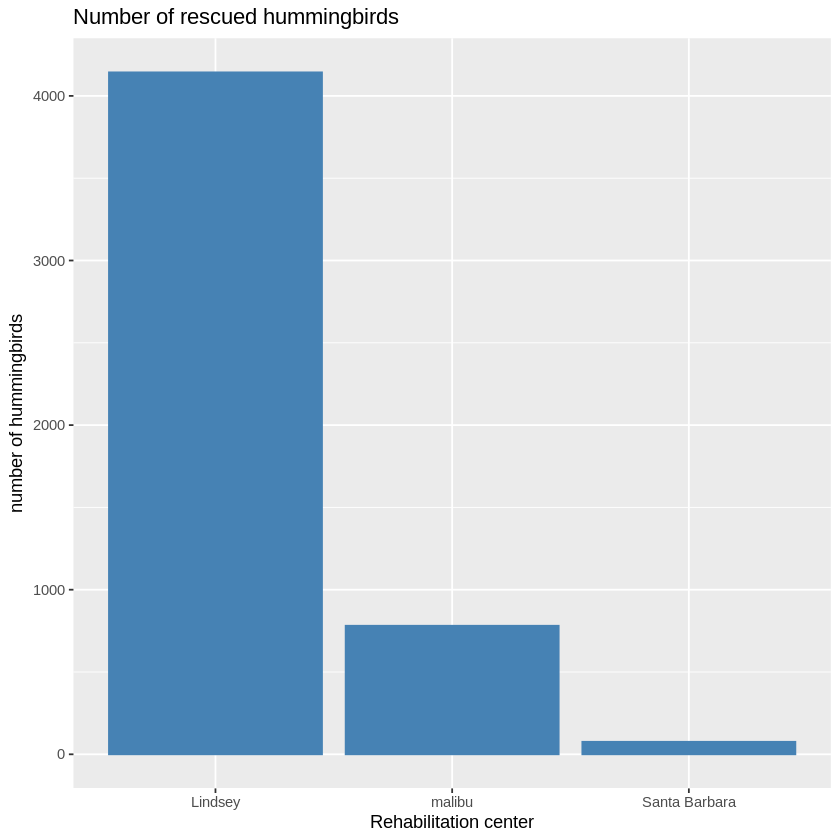

In [122]:
ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [123]:
ggsave("number_of_rescued_hummingbirds.pdf", width = 4, height = 3)

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

ANSWER HERE

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   

age

species

season

sex

reason for admission

2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

Some vartiables seem to be associated with the final disposition of hummingbirds. Adults, ANHU species, females, spring seasons and being found on the ground seem to have higher counts of dead hummingbirds.

Statistical regression analysis would be helpful for testing associations.

In [124]:
table_Species_e = model_data%>%
group_by(Species_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_Age_e = model_data%>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_Sex_e = model_data%>%
group_by(Sex_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_season = model_data%>%
group_by(season, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_r = model_data%>%
group_by(r, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


In [125]:
table_Species_e;
table_Age_e
table_Sex_e;
table_season;
table_r;

Species_e,Disposition_binary,count
<chr>,<chr>,<int>
ANHU,Died,2296
ANHU,Released,836
BCHU,Died,22
BCHU,Released,15
Non-selasphorus,Died,358
Non-selasphorus,Released,607
Selasphorus,Died,560
Selasphorus,Released,306


Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,432
Nestling,Released,734
adult-like,Died,2804
adult-like,Released,1030


Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2350
Female-like,Released,915
Male,Died,445
Male,Released,115
unknown,Died,441
unknown,Released,734


season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,382
Fall,Released,53
Spring,Died,1338
Spring,Released,951
Summer,Died,979
Summer,Released,578
Winter,Died,537
Winter,Released,182


r,Disposition_binary,count
<chr>,<chr>,<int>
caught by domestic animal,Died,470
caught by domestic animal,Released,171
found inside,Died,112
found inside,Released,44
found on the ground,Died,1431
found on the ground,Released,721
nest-related,Died,274
nest-related,Released,399
suspect torpor-like state,Died,89


In [ ]:
#·facet_grid(. ~ Disposition_binary)+ coord_flip()

ERROR: Error in facet_grid(. ~ Disposition_binary): could not find function "facet_grid"


In [126]:
Species = ggplot(table_Species_e, aes(x = Species_e, y = count, fill = Disposition_binary))+
  geom_bar(stat= "identity" , position = "dodge")+
  facet_grid(. ~ Disposition_binary)+ coord_flip()+
  xlab("Species") + ylab ("Number of Hummingbirds")+
  labs (title = "Number of Hummingbirds by Species and Disposition")

Age=ggplot(table_Age_e, aes(x = Age_e, y = count, fill = Disposition_binary))+
  geom_bar(stat= "identity" , position = "dodge")+
  facet_grid(. ~ Disposition_binary)+ coord_flip()+
  xlab("Age") + ylab ("Number of Hummingbirds")+
  labs (title = "Number of Hummingbirds by Age and Disposition")

Sex=ggplot(table_Sex_e, aes(x = Sex_e, y = count, fill = Disposition_binary))+
  geom_bar(stat= "identity" , position = "dodge")+
  facet_grid(. ~ Disposition_binary)+ coord_flip()+
  xlab("Sex") + ylab ("Number of Hummingbirds")+
  labs (title = "Number of Hummingbirds by Sex and Disposition")

Season=ggplot(table_season, aes(x = season, y = count, fill = Disposition_binary))+
  geom_bar(stat= "identity" , position = "dodge")+
  facet_grid(. ~ Disposition_binary)+ coord_flip()+
  xlab("Season") + ylab ("Number of Hummingbirds")+
  labs (title = "Number of Hummingbirds by Season and Disposition")

Reason=ggplot(table_r, aes(x = r, y = count, fill = Disposition_binary))+
  geom_bar(stat= "identity" , position = "dodge")+
  facet_grid(. ~ Disposition_binary)+ coord_flip()+
  xlab("Reason for Admission") + ylab ("Number of Hummingbirds")+
  labs (title = "Number of Hummingbirds by Reason for Admission and Disposition")


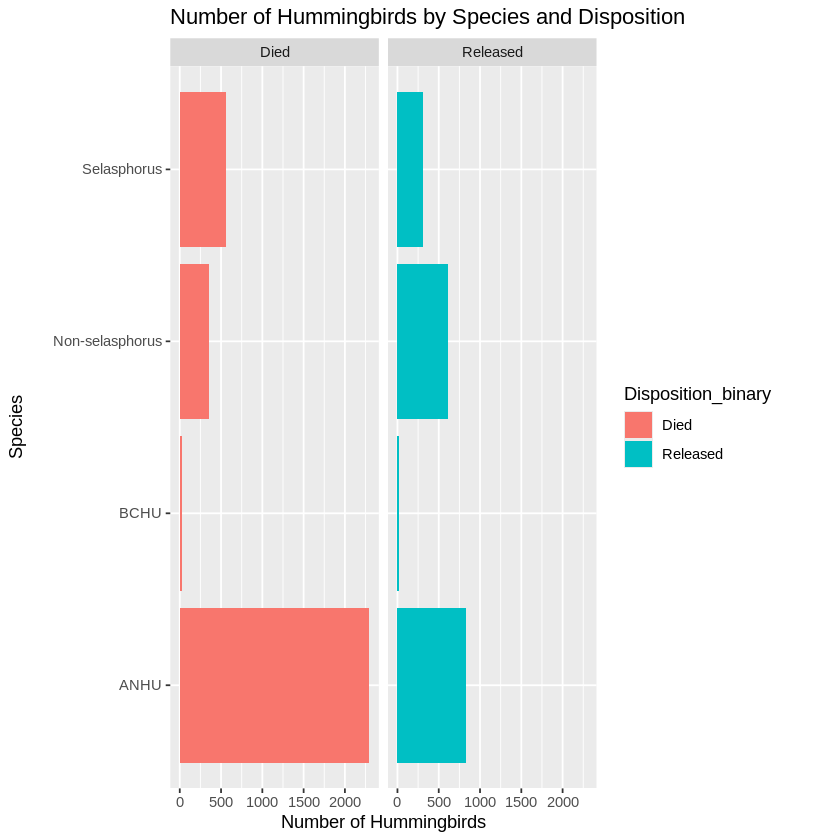

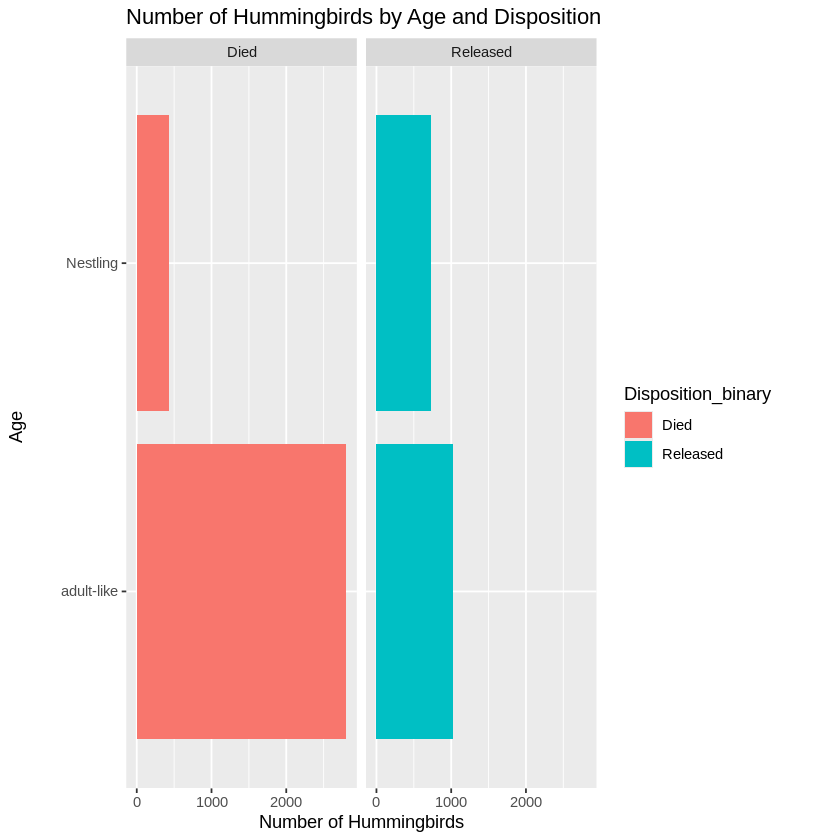

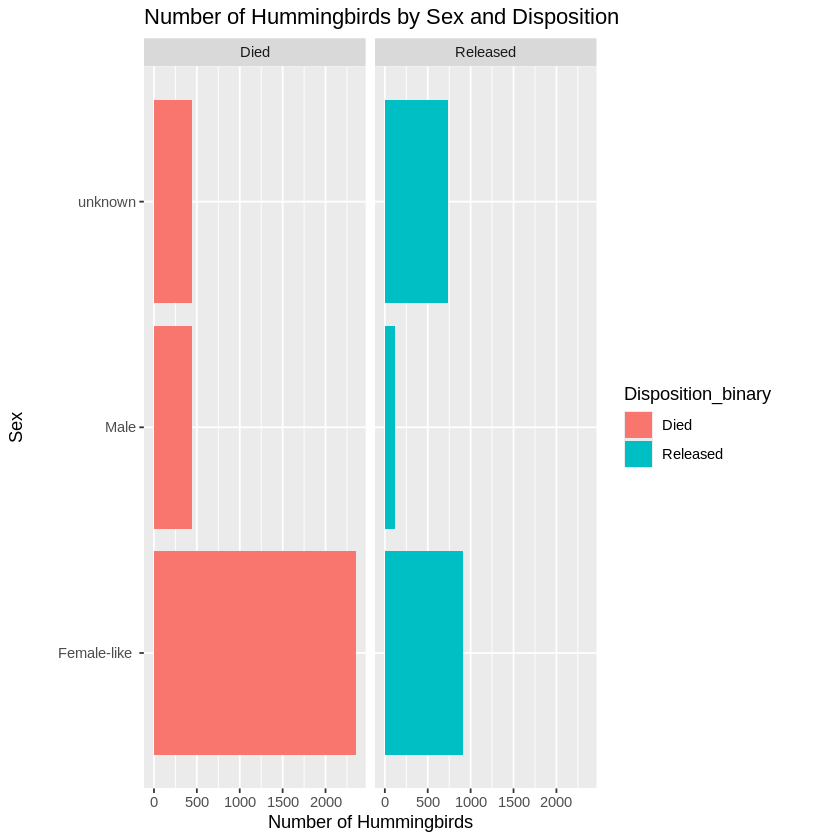

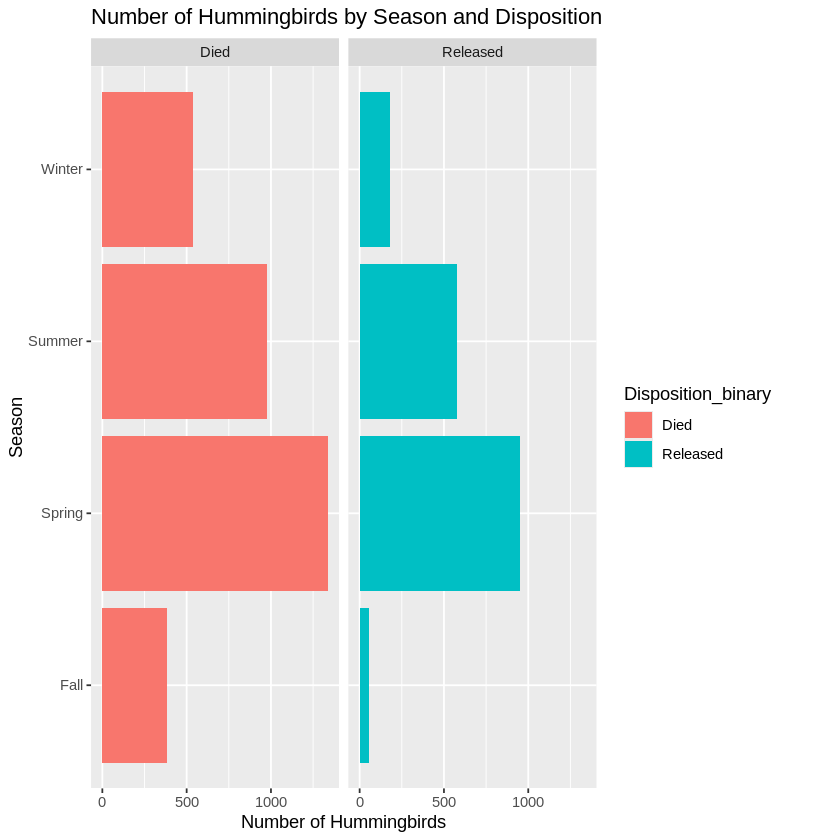

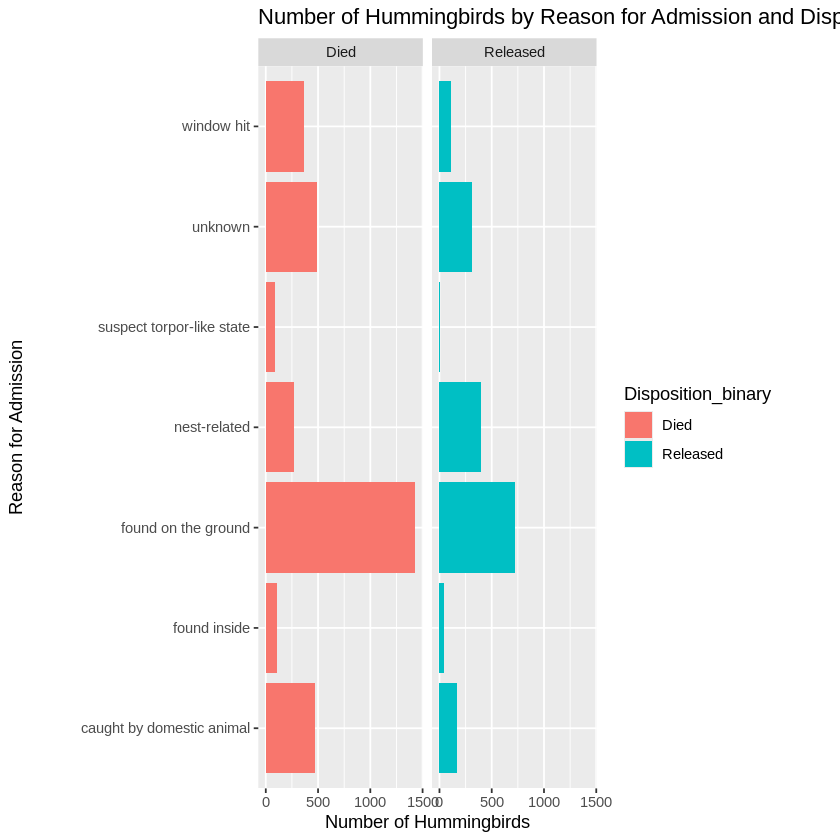

In [127]:
Species;
Age;
Sex;
Season;
Reason;

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


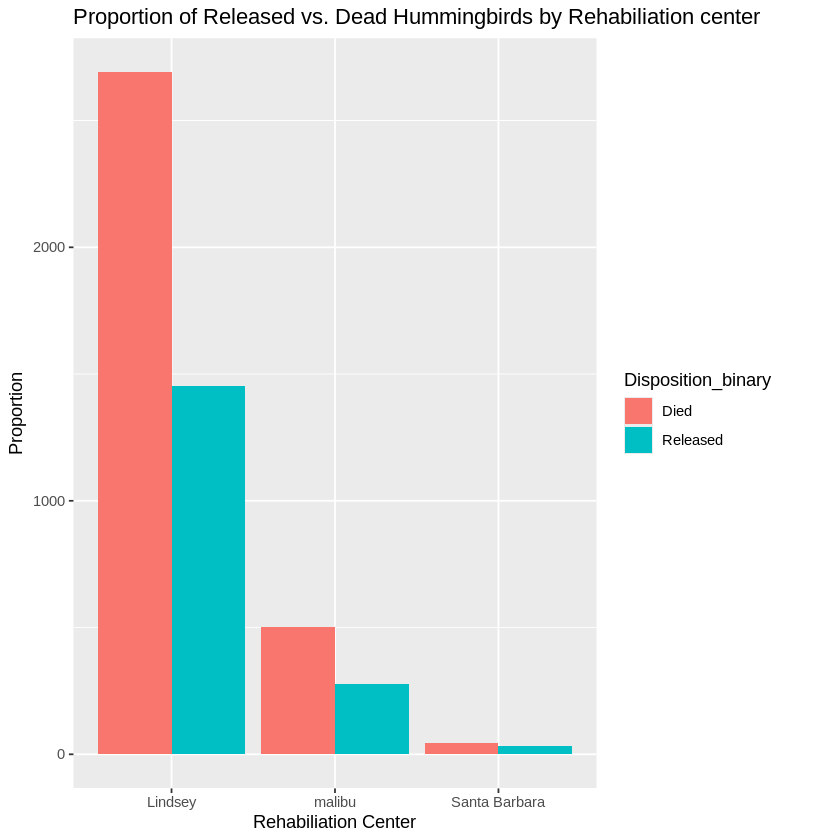

In [128]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place , y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab('Rehabiliation Center') +
  ylab('Proportion') +
  labs(title = 'Proportion of Released vs. Dead Hummingbirds by Rehabiliation center')

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

In [200]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?
table(model_data$Species_group)



Non-selasphorus     Selasphorus 
           4134             866 

In [201]:
model_data$Species_group = ifelse(
  model_data$Species_e %in% c ("ANHU", "BCHU", "Non-selasphorus"),
                                   "Non-selasphorus", "Selasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

Species_table = ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival of Hummingbirds by Species Group")

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


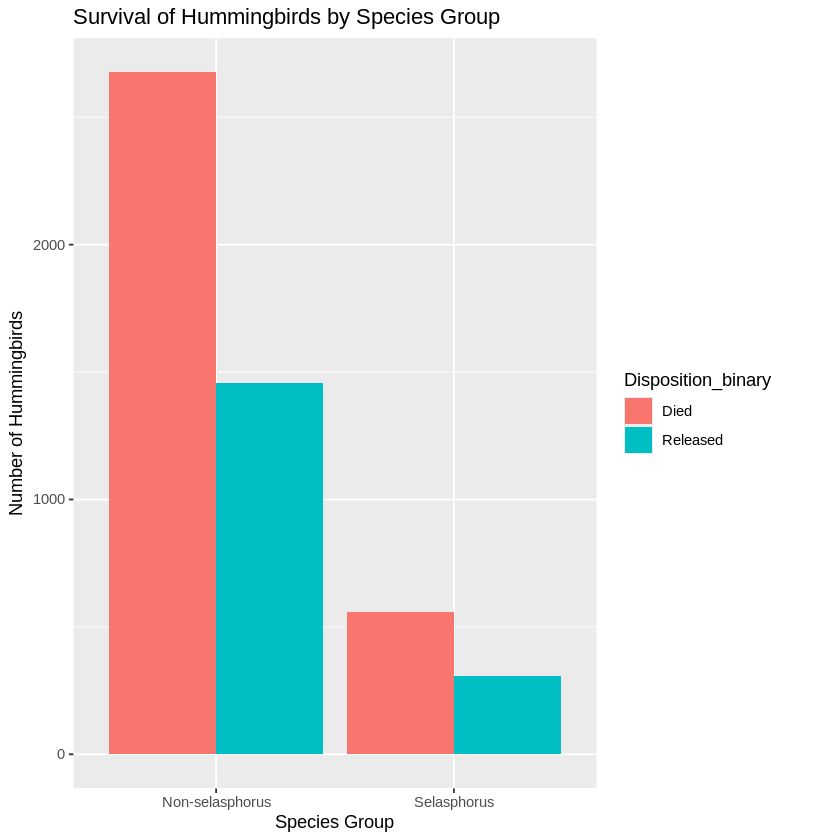

In [156]:
Species_table

ANALYSIS: Non selasphorus species have higher numbers of dead and released dispositions, compared to Selasphorus. From this table we can only tell count, not rate. The next section assesses rate, and the rates of died vs. released for both Non-selasphorus and Selasphorus are very similar.

In [157]:
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Species_group) %>%
  mutate(rate = count / sum(count))

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


In [158]:
Speciesrate_table = ggplot(species_distribution,
                       aes(x = Species_group, y = rate, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Proportion of Hummingbirds") +
  labs(title = "Survival Rate of Hummingbirds by Species Group")


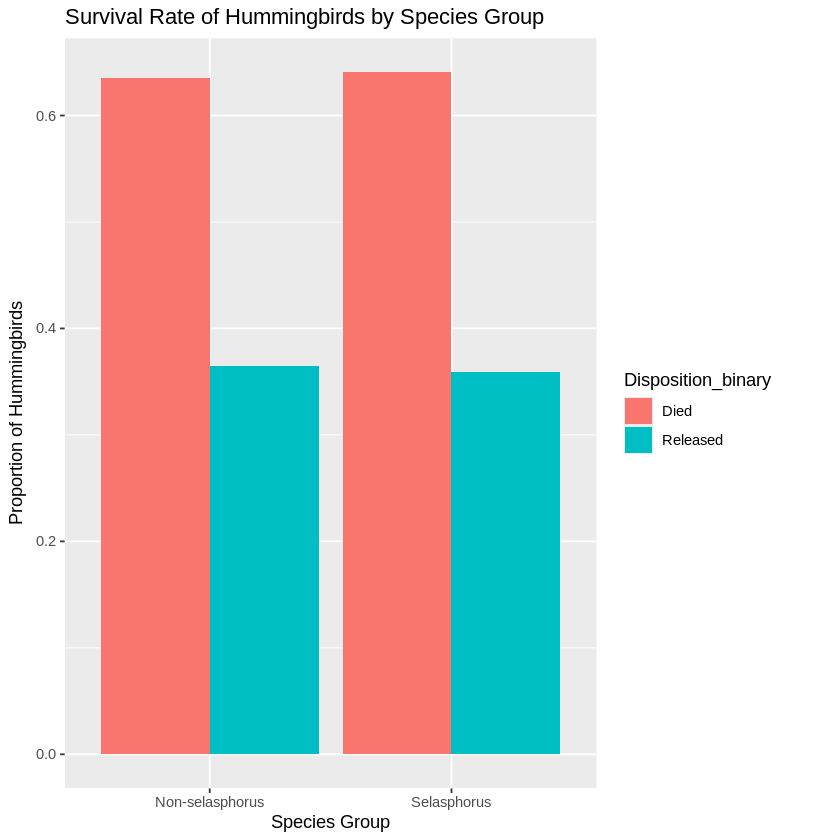

In [ ]:
Speciesrate_table

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [199]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

In [135]:
# Admitted has been formatted into Admitted_date to be in Month/Day/Year order

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [161]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

In [162]:
admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

In [163]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Month") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbirds Admissions by Month")

In [164]:
## Plot similar timeline for Yearly admissions of Hummingbirds
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Year") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbirds Admissions by Year")

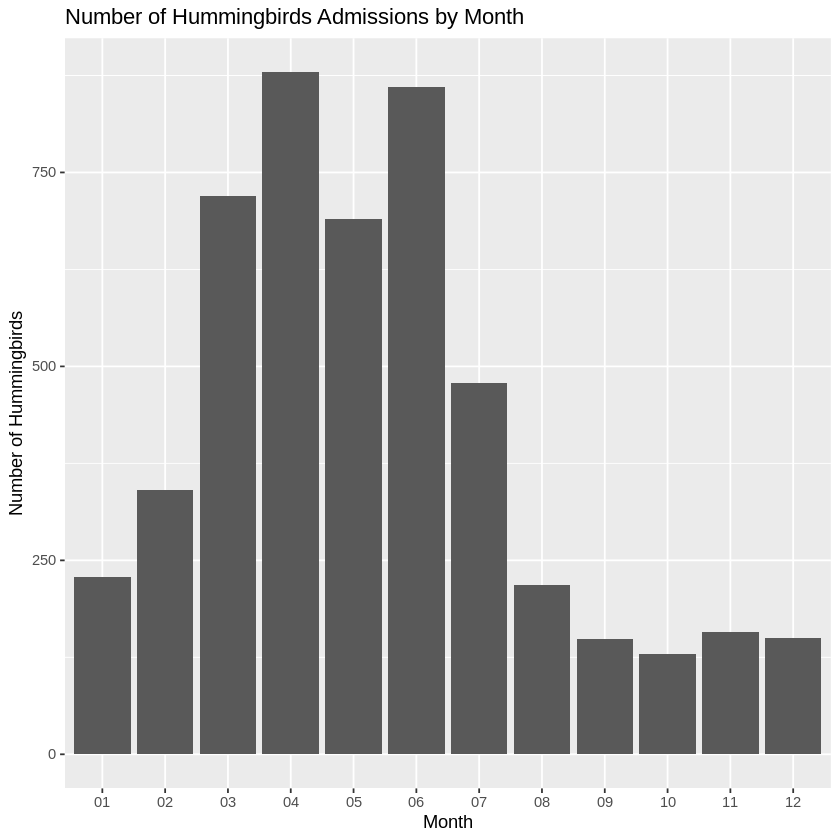

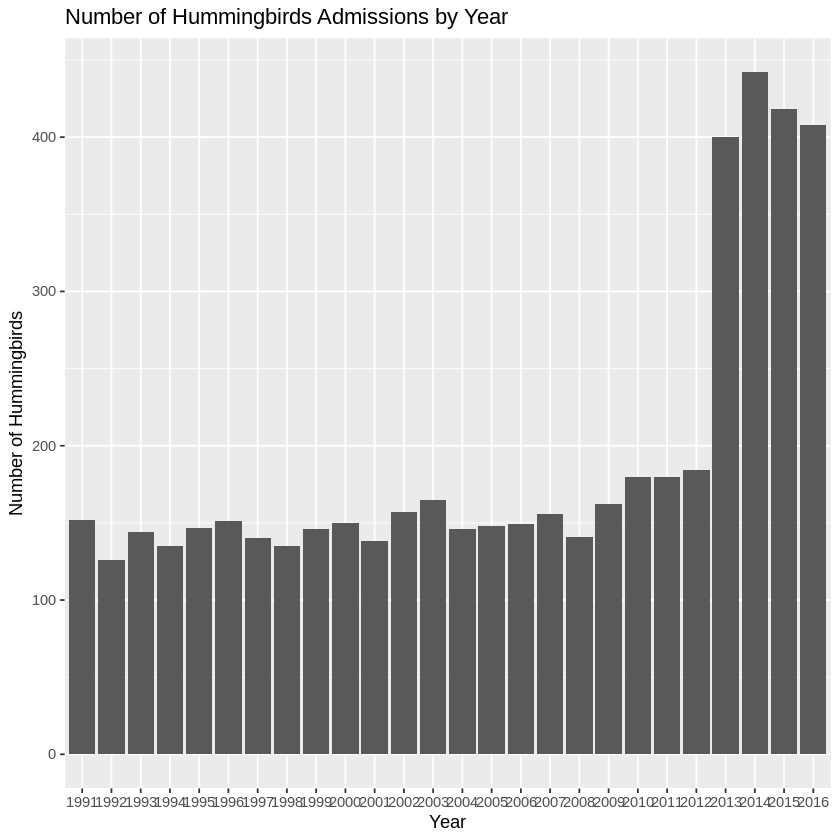

In [165]:
p_month;
p_year;

In [ ]:
##NOVEMBER 19 GITHUB LAB PART 5 STEP 7

In [141]:
library(lubridate)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


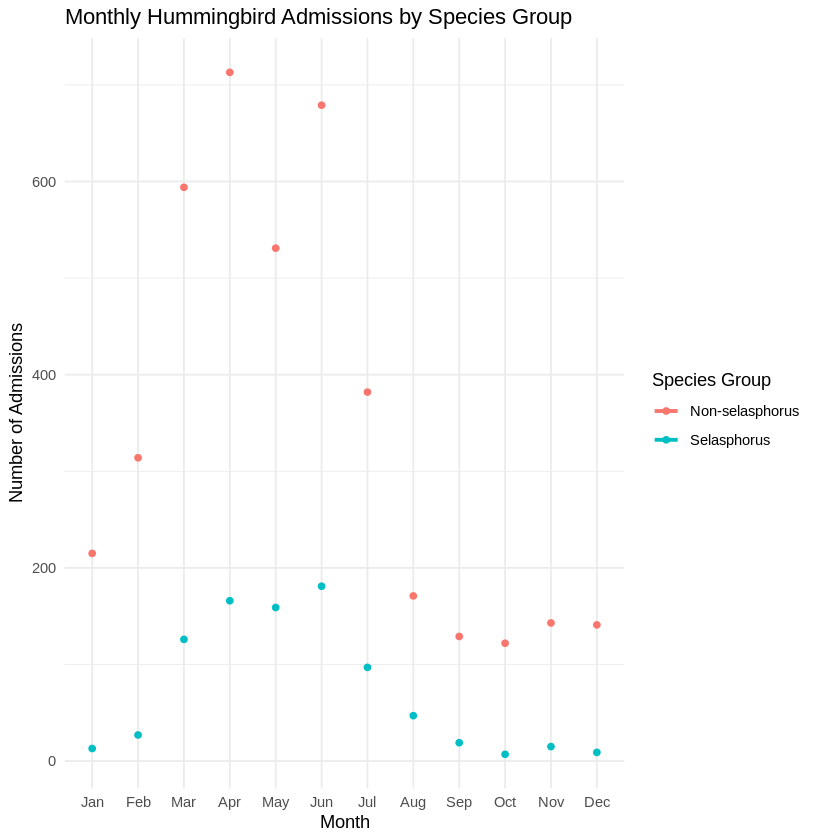

In [202]:
# Summarize monthly admissions by species group
  monthly_admissions = model_data%>%
  mutate(Month = month(Admitted_date, label = TRUE, abbr = TRUE)) %>%
 group_by(Month, Species_group)%>%
  summarise(count = n(), .groups = "drop")

# Timeline plot
ggplot(monthly_admissions, aes(x = Month, y = count, color = Species_group)) +
  geom_line(linewidth = 1.1) +
  geom_point() +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of Admissions",
    color = "Species Group"
  ) +
  theme_minimal()

In [215]:
model_data$Disposition_numeric = ifelse(model_data$Disposition_binary == "Release", 1, 0)

fullmodel  = glm(Disposition_numeric ~ r + Green_Orange + season+F_Aid+Species_e,
                 data = model_data,
                 family= binomial ( link= logit))
fullmodel

Warning message:
“glm.fit: algorithm did not converge”



Call:  glm(formula = Disposition_numeric ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                  -2.657e+01                    -6.954e-16  
        rfound on the ground                 rnest-related  
                  -1.291e-15                     1.333e-14  
  rsuspect torpor-like state                      runknown  
                  -7.681e-16                     3.286e-16  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                  -1.046e-15                    -3.427e-16  
                seasonSpring                  seasonSummer  
                   7.762e-16                    -9.318e-15  
                seasonWinter                      F_AidYes  
                   2.300e-16                    -9.377e-15  
               Species_eBCHU      Species_eNon-selasphorus  
                   4.411e-16                

In [186]:
summary(fullmodel)


Call:
glm(formula = Disposition_numeric ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)
(Intercept)                  -2.657e+01  2.132e+04  -0.001    0.999
rfound inside                -6.954e-16  3.191e+04   0.000    1.000
rfound on the ground         -1.291e-15  1.621e+04   0.000    1.000
rnest-related                 1.333e-14  2.165e+04   0.000    1.000
rsuspect torpor-like state   -7.681e-16  3.904e+04   0.000    1.000
runknown                      3.286e-16  1.938e+04   0.000    1.000
rwindow hit                  -1.046e-15  2.171e+04   0.000    1.000
Green_OrangeSelasphorus spp. -3.427e-16  1.449e+04   0.000    1.000
seasonSpring                  7.762e-16  1.908e+04   0.000    1.000
seasonSummer                 -9.318e-15  1.972e+04   0.000    1.000
seasonWinter                  2.300e-16  2.175e+0

In [216]:
backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")


Start:  AIC=28
Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=28
Disposition_numeric ~ r + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- r          6 2.9008e-08  16   0        1
- season     3 2.9008e-08  22   0        1
- Species_e  3 2.9008e-08  22   0        1
- F_Aid      1 2.9008e-08  26   0        1
<none>         2.9008e-08  28             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=16
Disposition_numeric ~ season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- season     3 2.9008e-08  10   0        1
- Species_e  3 2.9008e-08  10   0        1
- F_Aid      1 2.9008e-08  14   0        1
<none>         2.9008e-08  16             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=10
Disposition_numeric ~ F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- Species_e  3 2.9008e-08   4   0        1
- F_Aid      1 2.9008e-08   8   0        1
<none>         2.9008e-08  10             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=4
Disposition_numeric ~ F_Aid



Warning message:
“glm.fit: algorithm did not converge”


        Df   Deviance AIC LRT Pr(>Chi)
- F_Aid  1 2.9008e-08   2   0        1
<none>     2.9008e-08   4             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=2
Disposition_numeric ~ 1



In [217]:
forward_model = step(fullmodel,k=2,direction = ,test="Chisq")


Start:  AIC=28
Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=28
Disposition_numeric ~ r + season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- r          6 2.9008e-08  16   0        1
- season     3 2.9008e-08  22   0        1
- Species_e  3 2.9008e-08  22   0        1
- F_Aid      1 2.9008e-08  26   0        1
<none>         2.9008e-08  28             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=16
Disposition_numeric ~ season + F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- season     3 2.9008e-08  10   0        1
- Species_e  3 2.9008e-08  10   0        1
- F_Aid      1 2.9008e-08  14   0        1
<none>         2.9008e-08  16             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=10
Disposition_numeric ~ F_Aid + Species_e



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


            Df   Deviance AIC LRT Pr(>Chi)
- Species_e  3 2.9008e-08   4   0        1
- F_Aid      1 2.9008e-08   8   0        1
<none>         2.9008e-08  10             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=4
Disposition_numeric ~ F_Aid



Warning message:
“glm.fit: algorithm did not converge”


        Df   Deviance AIC LRT Pr(>Chi)
- F_Aid  1 2.9008e-08   2   0        1
<none>     2.9008e-08   4             


Warning message:
“glm.fit: algorithm did not converge”



Step:  AIC=2
Disposition_numeric ~ 1



In [189]:
names(backward_model)


[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

In [192]:
length(names(backward_model))


[1] 31

In [ ]:
# Q1. 31 model properties

In [212]:
library(sjPlot)

In [219]:
tab_model(backward_model)

In [222]:
summary(backward_model)


Call:
glm(formula = Disposition_numeric ~ 1, family = binomial(link = logit), 
    data = model_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -26.57    5036.35  -0.005    0.996

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 4999  degrees of freedom
Residual deviance: 2.9008e-08  on 4999  degrees of freedom
AIC: 2

Number of Fisher Scoring iterations: 25


In [220]:
summary(fullmodel)


Call:
glm(formula = Disposition_numeric ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)
(Intercept)                  -2.657e+01  2.132e+04  -0.001    0.999
rfound inside                -6.954e-16  3.191e+04   0.000    1.000
rfound on the ground         -1.291e-15  1.621e+04   0.000    1.000
rnest-related                 1.333e-14  2.165e+04   0.000    1.000
rsuspect torpor-like state   -7.681e-16  3.904e+04   0.000    1.000
runknown                      3.286e-16  1.938e+04   0.000    1.000
rwindow hit                  -1.046e-15  2.171e+04   0.000    1.000
Green_OrangeSelasphorus spp. -3.427e-16  1.449e+04   0.000    1.000
seasonSpring                  7.762e-16  1.908e+04   0.000    1.000
seasonSummer                 -9.318e-15  1.972e+04   0.000    1.000
seasonWinter                  2.300e-16  2.175e+0

In [221]:
exp(coef(backward_model))

(Intercept) 
2.900701e-12

In [ ]:
# Q2. season_spring
# Q3. they do not match